In [2]:
import os

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm # Displays a progress bar
import os
import urllib.request as urlreq

import torch
import os
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchsummary import summary
from torchvision import datasets, transforms
from torch.utils.data import Dataset, Subset, DataLoader, random_split
from torchvision import datasets, transforms, models

In [3]:
# The following notebook preprocesses all the images by detecting facial landmarks and appending those landmarks 
# to the images, which are then ran through our model

# Landmark Detector Preprocessing

In [4]:
import cv2

def get_landmarks(img_name):
    img = cv2.imread(img_name, cv2.IMREAD_GRAYSCALE)
    #img = cv2.imread(img_name)
    # save face detection algorithm's url in haarcascade_url variable
    haarcascade_url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt2.xml"

    # save face detection algorithm's name as haarcascade
    haarcascade = "haarcascade_frontalface_alt2.xml"

    # chech if file is in working directory
    if (haarcascade not in os.listdir(os.curdir)):
        # download file from url and save locally as haarcascade_frontalface_alt2.xml, < 1MB
        urlreq.urlretrieve(haarcascade_url, haarcascade)
        print("File downloaded")

    # create an instance of the Face Detection Cascade Classifier
    detector = cv2.CascadeClassifier(haarcascade)

    # Detect faces using the haarcascade classifier on the "grayscale image"
    faces = detector.detectMultiScale(img)

    if len(faces) == 0:
        faces = np.array([[0,0,48,48]])
        
    img = cv2.imread(img_name)
    LBFmodel_url = "https://github.com/kurnianggoro/GSOC2017/raw/master/data/lbfmodel.yaml"

    # save facial landmark detection model's name as LBFmodel
    LBFmodel = "lbfmodel.yaml"

    # check if file is in working directory
    if (LBFmodel not in os.listdir(os.curdir)):
        # download picture from url and save locally as lbfmodel.yaml, < 54MB
        urlreq.urlretrieve(LBFmodel_url, LBFmodel)
        print("File downloaded")

    # create an instance of the Facial landmark Detector with the model
    landmark_detector  = cv2.face.createFacemarkLBF()
    landmark_detector.loadModel(LBFmodel)

    # Detect landmarks on "image_gray"
    _, landmarks = landmark_detector.fit(img, faces)

    for landmark in landmarks:
        for x,y in landmark[0]:
            # display landmarks on "image_cropped"
            # with white colour in BGR and thickness 1
            cv2.circle(img, (int(x), int(y)), 0, (255, 0, 0), 1)
    plt.axis("off")
    #plt.imshow(img)
    print("new_images/"+(img_name).split(".")[0]+".png")
    plt.imsave("new_images/"+(img_name).split(".")[0]+".png", img)

## Train Part 1 - Mutaman

['14147.jpg', '24084.jpg', '19463.jpg', '11759.jpg', '9041.jpg', '19311.jpg', '28872.jpg', '34283.jpg', '24090.jpg', '32816.jpg', '16778.jpg', '18966.jpg', '14184.jpg', '10490.jpg', '34240.jpg', '7911.jpg', '18972.jpg', '28641.jpg', '31476.jpg', '27200.jpg', '8149.jpg', '7508.jpg', '10889.jpg', '10651.jpg', '33088.jpg', '17116.jpg', '13416.jpg', '11215.jpg', '13402.jpg', '31648.jpg', '26334.jpg', '15926.jpg', '34056.jpg', '32433.jpg', '22146.jpg', '10692.jpg', '29013.jpg', '28325.jpg', '24279.jpg', '23264.jpg', '13238.jpg', '10057.jpg', '22797.jpg', '16354.jpg', '28292.jpg', '8767.jpg', '18423.jpg', '13210.jpg', '20802.jpg', '26240.jpg', '24331.jpg', '3815.jpg', '3801.jpg', '24325.jpg', '8954.jpg', '29167.jpg', '16397.jpg', '20625.jpg', '28279.jpg', '27176.jpg', '35572.jpg', '18609.jpg', '19503.jpg', '12456.jpg', '13748.jpg', '7656.jpg', '32976.jpg', '32962.jpg', '18621.jpg', '28709.jpg', '34320.jpg', '32751.jpg', '34446.jpg', '20433.jpg', '18806.jpg', '22218.jpg', '23106.jpg', '18184.

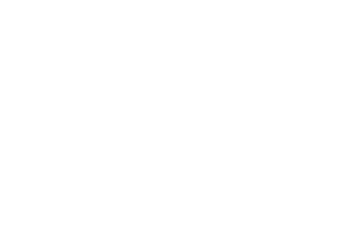

In [7]:
from pathlib import Path


for name in ["angry", "disgust", "fear"]:
    path = "images/train/" + name
    Path("new_images/images/train/"+name).mkdir(parents=True, exist_ok=True)
    files = os.listdir(path)
    print(files)
    for i in range(1, len(files)):
        filename = files[i]
        f = os.path.join(path, filename)
        # checking if it is a file
        if os.path.isfile(f):
            print(f)
        get_landmarks(f)

## Train Part 2 Andrew

images/train/happy/16988.jpg
new_images/images/train/happy/16988.png
images/train/happy/2666.jpg
new_images/images/train/happy/2666.png
images/train/happy/5109.jpg
new_images/images/train/happy/5109.png
images/train/happy/11981.jpg


KeyboardInterrupt: 

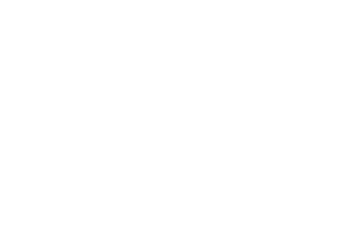

In [6]:
from pathlib import Path


for name in ["happy", "neutral", "sad", "surprise"]:
    path = "images/train/" + name
    Path("new_images/images/train/"+name).mkdir(parents=True, exist_ok=True)
    files = os.listdir(path)
    for i in range(1, len(files)):
        filename = files[i]
        f = os.path.join(path, filename)
        # checking if it is a file
        if os.path.isfile(f):
            print(f)
        get_landmarks(f)

## Validation - Tang

images/validation/angry/29588.jpg
new_images/images/validation/angry/29588.png
images/validation/angry/11017.jpg
new_images/images/validation/angry/11017.png
images/validation/angry/35162.jpg
new_images/images/validation/angry/35162.png
images/validation/angry/4015.jpg
new_images/images/validation/angry/4015.png
images/validation/angry/22807.jpg
new_images/images/validation/angry/22807.png
images/validation/angry/15715.jpg


KeyboardInterrupt: 

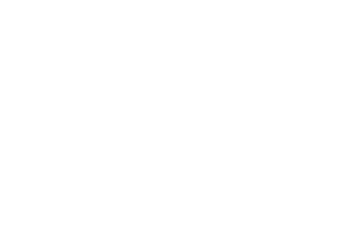

In [5]:
for name in ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]:
    path = "images/validation/" + name
    Path("new_images/images/validation/"+name).mkdir(parents=True, exist_ok=True)
    files = os.listdir(path)
    for i in range(1, len(files)):
        filename = files[i]
        f = os.path.join(path, filename)
        # checking if it is a file
        if os.path.isfile(f):
            print(f)
        get_landmarks(f)

## Test - Nicole

images/test/angry/30797.jpg
new_images/images/test/angry/30797.png
images/test/angry/2100.jpg
new_images/images/test/angry/2100.png
images/test/angry/30783.jpg
new_images/images/test/angry/30783.png
images/test/angry/2672.jpg
new_images/images/test/angry/2672.png
images/test/angry/77.jpg


KeyboardInterrupt: 

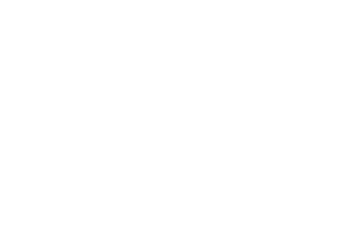

In [4]:
for name in ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]:
    path = "images/test/" + name
    Path("new_images/images/test/"+name).mkdir(parents=True, exist_ok=True)
    files = os.listdir(path)
    for i in range(1, len(files)):
        filename = files[i]
        f = os.path.join(path, filename)
        # checking if it is a file
        if os.path.isfile(f):
            print(f)
        get_landmarks(f)